# **Zomato Restaurant Data**

We aim to answer questions such as:


1.   Do more restaurants provide online delivery compared
to offline services?
2.   Which types of restaurants are most favored by the general public?
3. What price range do couples prefer for dining out?

.... and more



---



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('Zomato-data-.csv')

In [49]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [50]:
#Null Value

data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


## **Data Cleaning**

In [51]:
Rate = data['rate'].str.split('/').str[0]

In [52]:
data['rate_new'] = Rate

In [53]:
data = data.drop('rate',axis=1)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   votes                        148 non-null    int64 
 4   approx_cost(for two people)  148 non-null    int64 
 5   listed_in(type)              148 non-null    object
 6   rate_new                     148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# **Data Visualization**

Text(0.5, 0, 'Type of restaurant')

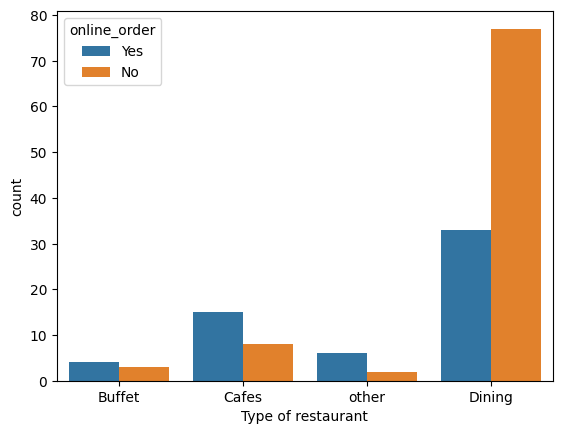

In [55]:
# Do more restaurants provide online delivery compared to offline services?
sns.countplot(x=data['listed_in(type)'], hue=data['online_order'])
plt.xlabel("Type of restaurant")

***Conclusion:*** The majority of the restaurant category falls under dining category. However, we can observe that most in dining are offline in nature.

While, for other categories, like Buffet, cafes, the maximum are online.

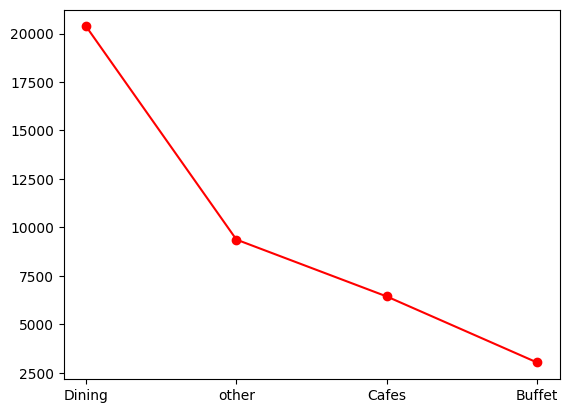

In [56]:
#Which types of restaurants are most favored by the general public?

list_of_rest_votes = data.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
list_of_rest_votes
plt.plot(list_of_rest_votes,marker='o',c='red')

***Conclusion:*** The Dining resturants received the maximum votes in comparion to other types. We can see, the Buffet types have received the lowest vote, indicating it is the least favored resturant type.

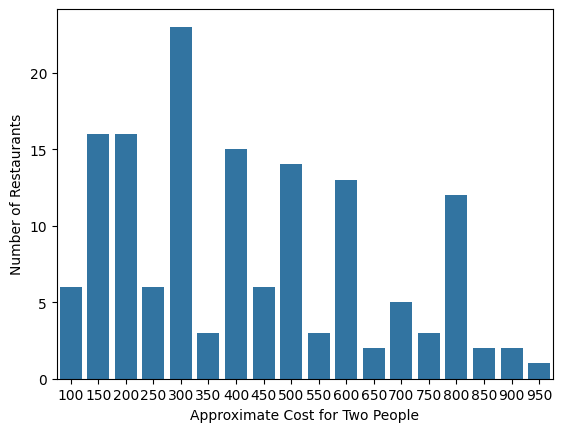

In [57]:
#What price range do couples prefer for dining out in visualization normal plot
sns.countplot(x=data['approx_cost(for two people)'])
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Number of Restaurants')
plt.show()

As observed, maximum orders are from restaurants having approximate cost for two people as Rs. 300.

---



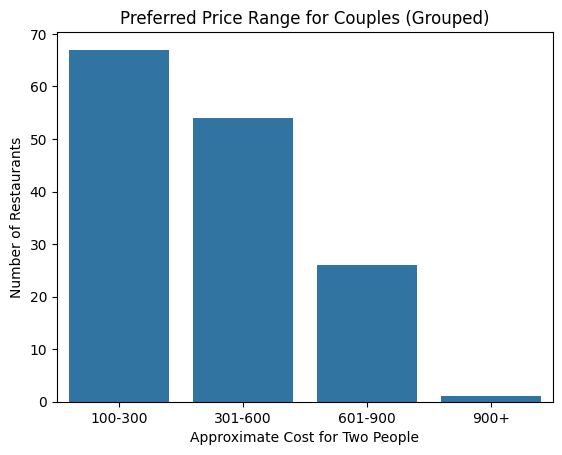

In [58]:
bins = [0, 300, 600, 900, data['approx_cost(for two people)'].max()]
labels = ['100-300', '301-600', '601-900', '900+']

data['price_range'] = pd.cut(data['approx_cost(for two people)'], bins=bins, labels=labels, right=True)

sns.countplot(x=data['price_range'])
plt.title('Preferred Price Range for Couples (Grouped)')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Number of Restaurants')
plt.show()

***Conclusion***: Since, maximum customers have ordered from restaurants price range of 100-300, maximum couple might prefers cost of Rs. 100 to Rs. 300 price range.

As observed, as the price increases the number of orders also decreases. Hence, most resturants wants to serve the price conscious customers.`


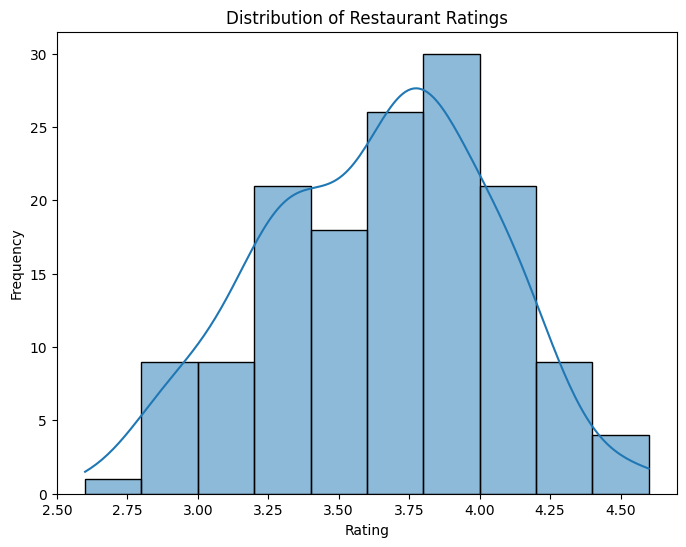

In [72]:
# Normal Distribution of Rating
plt.figure(figsize=(8, 6))
sns.histplot(data['rate_new'].dropna(), kde=True, bins=10)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

***Conclusion:*** Maximum restaurants have the rating of 3.75 to 4.25;

In [60]:
# The Resturant with highest rating

highest_rating = data.groupby('name')['rate_new'].max().sort_values(ascending=False)
highest_rating.head(1)

,rate_new
name,
Onesta,4.6


***Conclusion***: The Resturant with the highest rating is Onesta with 4.6/5, however it doesn't mean they are the best one, let's look into the number of votes it received.

In [64]:
#Votes of Onesta:

onesta_votes = data[data['name'] == 'Onesta']
onesta_votes

,name,online_order,book_table,votes,approx_cost(for two people),listed_in(type),rate_new,price_range
7,Onesta,Yes,Yes,2556,600,Cafes,4.6,301-600
44,Onesta,Yes,Yes,2556,600,other,4.6,301-600


***Conclusion***: The votes received is 2556. Let's compare it with the resturant that has received the maximum votes.

In [62]:
#Resturant with highest vote.

highest_vote =  data.groupby('name')['votes'].max().sort_values(ascending=False)
highest_vote.head(1)

,votes
name,
Empire Restaurant,4884


In [63]:
empire_rating = data[data['name'] == 'Empire Restaurant']
empire_rating

,name,online_order,book_table,votes,approx_cost(for two people),listed_in(type),rate_new,price_range
38,Empire Restaurant,Yes,No,4884,750,other,4.4,601-900


***Conclusion:*** It is clear from above that inspite of having higher rating than Empire Restaurant, the votes received is more for Empire Restaurant.

Based on the data, we can't definitively say one is better—the ratings are too close. If forced to pick:

1. Go with Restaurant Onesta if you prioritize a higher average and are okay with slightly more uncertainty.

2. Choose Restaurant Empire Restaurant for its more robust sample size, which might indicate broader appeal and reliability.

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

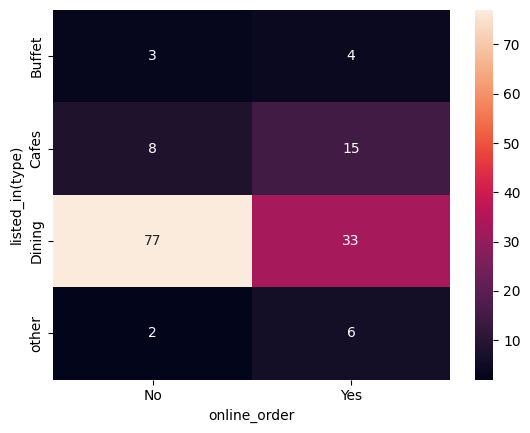

In [77]:
#Order Mode Preferences by Restaurant Type

order_mode = data.groupby('listed_in(type)')['online_order'].value_counts()
sns.heatmap(order_mode.unstack(), annot=True)

***Conclusion:*** Most "Dining" establishments do not offer online ordering, indicating traditional dining is still predominant.

Cafes are more likely than Buffets or "Other" types to support online ordering, likely reflecting a trend toward convenience in more casual formats.

The balance observed in Buffet and "Other" types suggests that these are less impacted by the online ordering trend, either due to business model or customer preferences.

#                                  **END OF THE NOTEBOOK**

---  

